In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sn

In [17]:
#Extracting Data
EmpAbs_data = pd.read_excel("Absenteeism_at_work_Project.xls")
print("Data read Successfully")

Data read Successfully


In [19]:
EmpAbs_data = EmpAbs_data.reset_index(drop=True)
EmpAbs_data.index += 1
Data = EmpAbs_data

In [31]:
#Converting variables to categoric and numeric
a= list(range(1, 5, 1))
b= list(range(11, 17, 1))
c=list(set().union(a,b))
for i in c:
    Data.iloc[:, i] = Data.iloc[:, i].astype('category')


Data.iloc[:, 0] = Data.iloc[:, 0].astype(object)
Data.iloc[:, 13] = Data.iloc[:, 13].astype('float64')
Data.iloc[:, 16] = Data.iloc[:, 16].astype('float64')

In [23]:
Data['ID'].describe()

count     740
unique     36
top         3
freq      113
Name: ID, dtype: int64

# Missing Values Analysis

In [32]:
#Missing value analysis
missing_val = pd.DataFrame(Data.isnull().sum())
missing_val

,0
ID,0
Reason_for_absence,3
Month_of_absence,1
Day_of_the_week,0
Seasons,0
Transportation_expense,7
Distance_from_Residence_to_Work,3
Service_time,3
Age,3
Work_load_Average_day,10


In [25]:
Data1 = Data[Data.isnull().any(axis=1)]
Data1

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
6,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,NaN
7,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
15,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,NaN,4.0
16,24,14.0,7.0,6,1,246.0,25.0,16.0,41.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,67.0,170.0,NaN,NaN
17,3,23.0,7.0,6,1,NaN,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
21,18,10.0,8.0,4,1,330.0,16.0,4.0,28.0,205917.0,...,0.0,2.0,0.0,0.0,0.0,0.0,84.0,182.0,25.0,NaN
25,11,18.0,8.0,2,1,289.0,36.0,13.0,33.0,205917.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,NaN,8.0
28,30,28.0,8.0,4,1,157.0,27.0,6.0,29.0,205917.0,...,0.0,1.0,0.0,1.0,1.0,0.0,75.0,185.0,NaN,4.0
32,2,18.0,8.0,5,1,235.0,29.0,12.0,48.0,205917.0,...,0.0,1.0,1.0,0.0,1.0,5.0,88.0,163.0,NaN,8.0
33,1,23.0,8.0,5,1,NaN,11.0,14.0,37.0,205917.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,4.0


In [33]:
#Creating a new Dataframe by data types
Data_num=Data.select_dtypes(['float64'])
Data_cat=Data.select_dtypes(['category'])
Data_num = Data_num.reset_index(drop=True)
Data_num.index += 1
Data_cat = Data_cat.reset_index(drop=True)
Data_cat.index += 1

In [34]:
Data_cat.head(5)

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Disciplinary_failure,Education,Social_drinker,Social_smoker
1,26.0,7.0,3,1,0.0,1.0,1.0,0.0
2,0.0,7.0,3,1,1.0,1.0,1.0,0.0
3,23.0,7.0,4,1,0.0,1.0,1.0,0.0
4,7.0,7.0,5,1,0.0,1.0,1.0,1.0
5,23.0,7.0,5,1,0.0,1.0,1.0,0.0


# Feature Selection

In [35]:
#Feature Selection using Correlation, VIF, and Chi-Square test

## 1) Correlation

correlations = Data_num.corr()
correlations
correlations.style.background_gradient()

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day,Hit_target,Son,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
Transportation_expense,1,0.257917,-0.349927,-0.22779,0.00133231,-0.0808867,0.382391,0.399665,-0.209945,-0.195982,-0.135928,0.0472163
Distance_from_Residence_to_Work,0.257917,1,0.128497,-0.147095,-0.0786912,-0.0141823,0.0470844,0.205575,-0.0466121,-0.357828,0.117728,-0.102967
Service_time,-0.349927,0.128497,1,0.670218,0.0134231,-0.00488155,-0.0505427,-0.441339,0.454772,-0.0578259,0.502634,0.0165598
Age,-0.22779,-0.147095,0.670218,1,-0.0369233,-0.0374263,0.0585017,-0.229964,0.418691,-0.0672474,0.467749,0.0779778
Work_load_Average_day,0.00133231,-0.0786912,0.0134231,-0.0369233,1,-0.0871998,0.0320352,-0.00093422,-0.0303855,0.109154,-0.0748954,0.0279859
Hit_target,-0.0808867,-0.0141823,-0.00488155,-0.0374263,-0.0871998,1,-0.0102965,0.00531286,-0.0448165,0.0887133,-0.0696561,0.0223112
Son,0.382391,0.0470844,-0.0505427,0.0585017,0.0320352,-0.0102965,1,0.112172,-0.142318,-0.0161395,-0.144819,0.120576
Pet,0.399665,0.205575,-0.441339,-0.229964,-0.00093422,0.00531286,0.112172,1,-0.106052,-0.106189,-0.0821825,-0.029018
Weight,-0.209945,-0.0466121,0.454772,0.418691,-0.0303855,-0.0448165,-0.142318,-0.106052,1,0.307546,0.90406,-0.00927527
Height,-0.195982,-0.357828,-0.0578259,-0.0672474,0.109154,0.0887133,-0.0161395,-0.106189,0.307546,1,-0.127717,0.0947721


In [36]:
## 2) Chi-square test

from scipy.stats import chi2_contingency
factors_paired_bin = [(i,j) for i in Data_cat.columns.values for j in Data_cat.columns.values] 

chi2_bin, p_values_bin =[], []

for f in factors_paired_bin:
    if f[0] != f[1]:
             chitest_bin = chi2_contingency(pd.crosstab(Data_cat[f[0]], Data_cat[f[1]]))   
             chi2_bin.append(chitest_bin[0])
             p_values_bin.append(chitest_bin[1])
            
    else:      
             chi2_bin.append(0)
             p_values_bin.append(0)

chi2_bin = np.array(chi2_bin).reshape((8,8))
chi2_df_bin = pd.DataFrame(chi2_bin, index=Data_cat.columns.values, columns=Data_cat.columns.values)
p_values_bin = np.array(p_values_bin).reshape((8,8)) # shaping it as a matrix
p_values_bin = pd.DataFrame(p_values_bin, index=Data_cat.columns.values, columns=Data_cat.columns.values)
p_values_bin

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Disciplinary_failure,Education,Social_drinker,Social_smoker
Reason_for_absence,0.000000e+00,4.925170e-19,0.058063,2.838194e-22,4.324537e-125,8.983660e-11,2.292921e-08,3.541072e-09
Month_of_absence,4.925170e-19,0.000000e+00,0.554457,0.000000e+00,2.042695e-04,1.326699e-02,9.479499e-03,2.333154e-02
Day_of_the_week,5.806286e-02,5.544573e-01,0.000000,1.953925e-01,2.976322e-01,5.928306e-01,6.325213e-01,8.073502e-01
Seasons,2.838194e-22,0.000000e+00,0.195393,0.000000e+00,7.817284e-05,9.018080e-02,1.291514e-01,7.879567e-02
Disciplinary_failure,4.324537e-125,2.042695e-04,0.297632,7.817284e-05,0.000000e+00,3.648447e-01,2.644425e-01,3.706029e-03
Education,8.983660e-11,1.326699e-02,0.592831,9.018080e-02,3.648447e-01,0.000000e+00,2.418696e-35,1.102812e-20
Social_drinker,2.292921e-08,9.479499e-03,0.632521,1.291514e-01,2.644425e-01,2.418696e-35,0.000000e+00,5.824784e-03
Social_smoker,3.541072e-09,2.333154e-02,0.807350,7.879567e-02,3.706029e-03,1.102812e-20,5.824784e-03,0.000000e+00


In [37]:
cnames_v = ['Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average_day', 'Transportation_expense',
       'Hit_target', 'Son', 'Pet', 'Weight', 'Height','Body_mass_index','Absenteeism_time_in_hours']

In [38]:
#VIF before dropping variable any variable
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf             
from statsmodels.tools.tools import add_constant
EmpAbs_data=EmpAbs_data.dropna()
numeric_df_v = add_constant(EmpAbs_data[cnames_v])
vif_v = pd.Series([vf(numeric_df_v.values, i) for i in range(numeric_df_v.shape[1])], 
                 index = numeric_df_v.columns)
vif_v

const                              23420.905934
Distance_from_Residence_to_Work        1.681130
Service_time                           3.371883
Age                                    2.424660
Work_load_Average_day                  1.049937
Transportation_expense                 1.597151
Hit_target                             1.043096
Son                                    1.255561
Pet                                    1.580640
Weight                               157.814366
Height                                28.786233
Body_mass_index                      147.832865
Absenteeism_time_in_hours              1.048464
dtype: float64

In [39]:
cnames = ['Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average_day', 'Transportation_expense',
       'Hit_target', 'Son', 'Pet', 'Weight', 'Height','Absenteeism_time_in_hours']

In [40]:
catnames = list(set(Data.columns) - set(cnames_v))

In [41]:
#VIF after dropping Body mass index variable
numeric_Data = add_constant(EmpAbs_data[cnames])
vif = pd.Series([vf(numeric_Data.values, i) for i in range(numeric_Data.shape[1])], 
                 index = numeric_Data.columns)
vif

const                              1844.786325
Distance_from_Residence_to_Work       1.600629
Service_time                          3.240114
Age                                   2.306970
Work_load_Average_day                 1.048436
Transportation_expense                1.591382
Hit_target                            1.042957
Son                                   1.251408
Pet                                   1.509672
Weight                                1.645911
Height                                1.484519
Absenteeism_time_in_hours             1.046549
dtype: float64

In [42]:
#Dropping redundant Features, and NAs from Target variable
Data = Data.drop(['Body_mass_index'], axis=1)
Data = Data.drop(Data[Data['Absenteeism_time_in_hours'].isnull()].index, axis=0)

In [43]:
#Marking cells as NA containing months of absence and reason of absence equal to zero
Data.loc[Data['Reason_for_absence'] == 0,'Reason_for_absence'] = np.nan
Data.loc[Data['Month_of_absence'] == 0,'Month_of_absence'] = np.nan

In [45]:
missing_val1 = pd.DataFrame(Data.isnull().sum())
missing_val1

,0
ID,0
Reason_for_absence,39
Month_of_absence,4
Day_of_the_week,0
Seasons,0
Transportation_expense,6
Distance_from_Residence_to_Work,3
Service_time,3
Age,2
Work_load_Average_day,8


In [46]:
Data2 = Data[Data.isnull().any(axis=1)]
Data2

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_day,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Absenteeism_time_in_hours
2,36,NaN,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,0.0
7,10,22.0,7.0,6,1,NaN,52.0,3.0,28.0,239554.0,97.0,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,8.0
17,3,23.0,7.0,6,1,NaN,51.0,18.0,38.0,239554.0,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,2.0
33,1,23.0,8.0,5,1,NaN,11.0,14.0,37.0,205917.0,92.0,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,4.0
46,34,23.0,9.0,2,1,118.0,NaN,10.0,37.0,241476.0,92.0,0.0,1.0,0.0,0.0,0.0,0.0,83.0,172.0,3.0
50,15,14.0,9.0,2,4,NaN,31.0,12.0,40.0,241476.0,92.0,0.0,1.0,1.0,1.0,0.0,1.0,73.0,171.0,32.0
52,29,NaN,9.0,2,4,225.0,26.0,9.0,28.0,241476.0,92.0,1.0,1.0,1.0,0.0,0.0,2.0,69.0,169.0,0.0
55,11,NaN,9.0,3,4,289.0,36.0,13.0,33.0,241476.0,92.0,1.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,0.0
59,13,NaN,9.0,4,4,369.0,17.0,12.0,31.0,241476.0,92.0,1.0,1.0,3.0,1.0,0.0,0.0,70.0,169.0,0.0
66,22,23.0,10.0,5,4,NaN,NaN,9.0,30.0,253465.0,93.0,0.0,3.0,0.0,0.0,0.0,0.0,56.0,171.0,1.0


# Imputing missing values after feature selection

In [51]:
#Imputing Numerical variables with mean method
for i in cnames:
    Data[i] = Data[i].fillna(Data[i].mean())
    

In [61]:
#Imputing Categorical variables with Mode Nethod
for i in catnames:
    Data[i] = Data[i].fillna(Data[i].mode().iloc[0])

In [62]:
missing_val1 = pd.DataFrame(Data.isnull().sum())
missing_val1

,0
ID,0
Reason_for_absence,0
Month_of_absence,0
Day_of_the_week,0
Seasons,0
Transportation_expense,0
Distance_from_Residence_to_Work,0
Service_time,0
Age,0
Work_load_Average_day,0


# Data Visualization

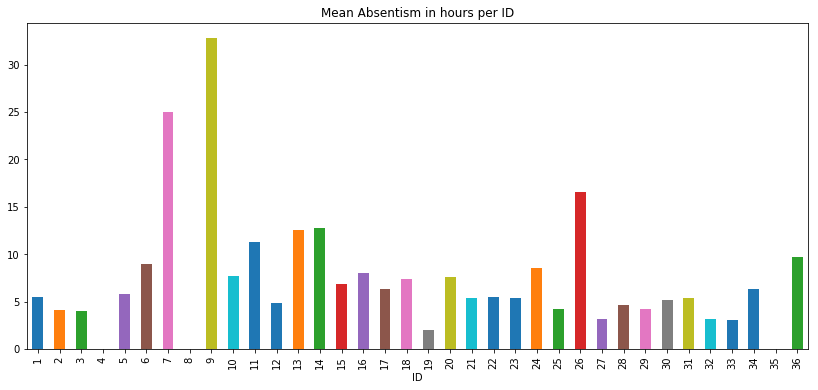

In [63]:
#Visualizations using barplots
import matplotlib.pyplot as plt
Data.groupby('ID')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism in hours per ID',figsize=(14,6))
plt.show()

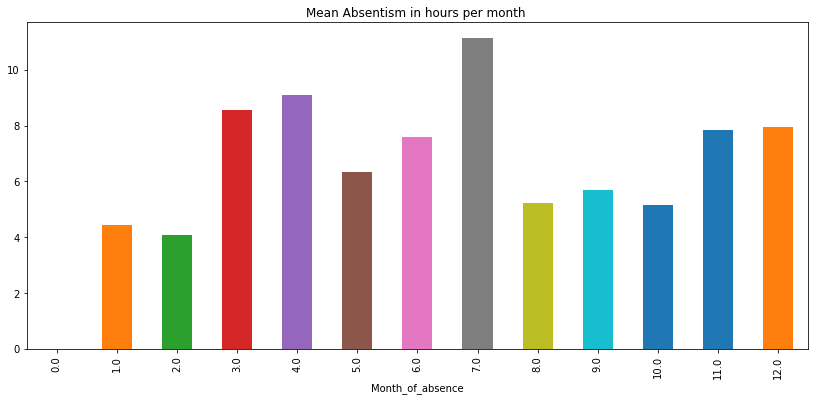

In [64]:
Data.groupby('Month_of_absence')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism in hours per month ',figsize=(14,6))
plt.show()

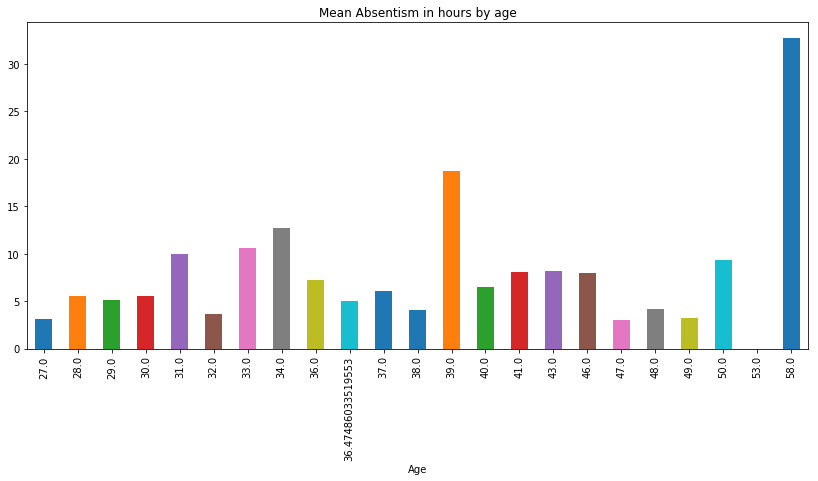

In [65]:
Data.groupby('Age')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism in hours by age',figsize=(14,6))
plt.show()

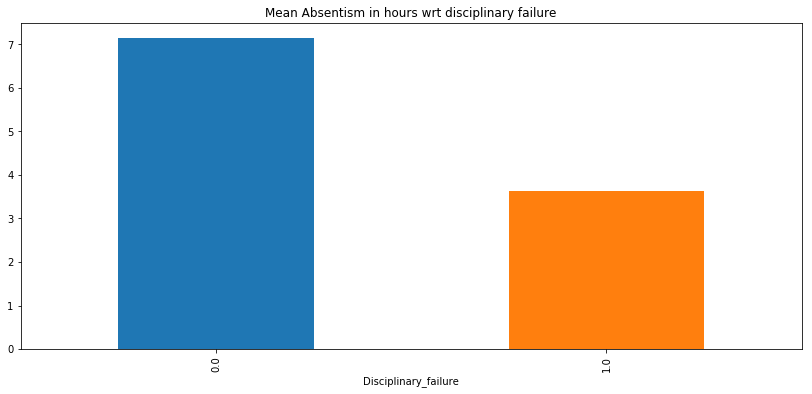

In [66]:
Data.groupby('Disciplinary_failure')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean Absentism in hours wrt disciplinary failure',figsize=(14,6))
plt.show()

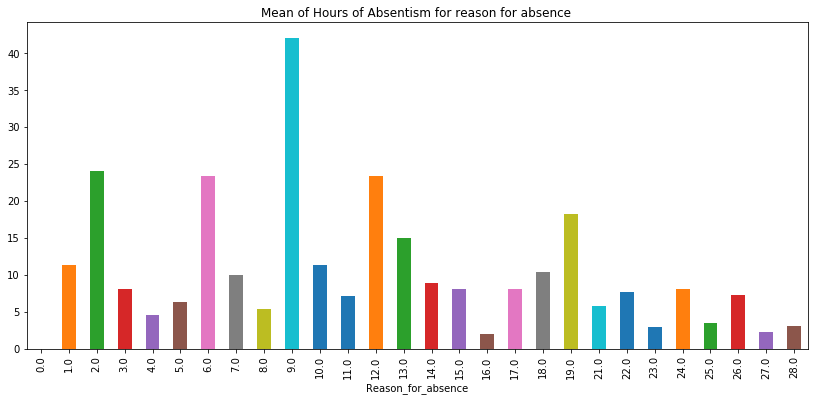

In [67]:
Data.groupby('Reason_for_absence')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean of Hours of Absentism for reason for absence ',figsize=(14,6))
plt.show()

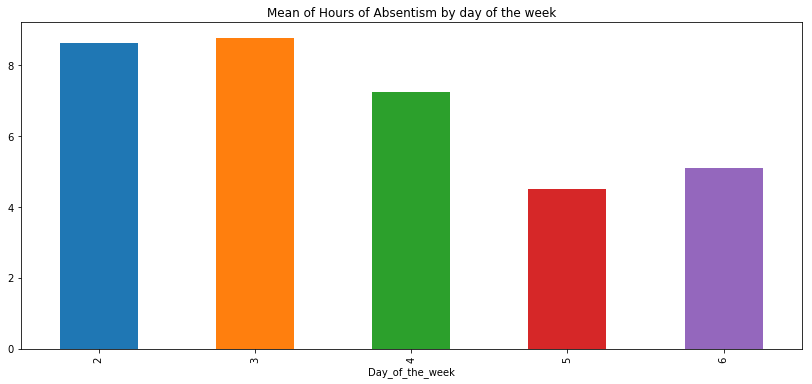

In [68]:
Data.groupby('Day_of_the_week')['Absenteeism_time_in_hours'].mean().plot(kind='bar',title='Mean of Hours of Absentism by day of the week',figsize=(14,6))
plt.show()

Transportation_expense                AxesSubplot(0.125,0.799681;0.227941x0.0803191)
Distance_from_Residence_to_Work    AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Service_time                       AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
Age                                   AxesSubplot(0.125,0.703298;0.227941x0.0803191)
Work_load_Average_day              AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
Hit_target                         AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
Son                                   AxesSubplot(0.125,0.606915;0.227941x0.0803191)
Pet                                AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
Weight                             AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
Height                                AxesSubplot(0.125,0.510532;0.227941x0.0803191)
Body_mass_index                    AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
Absenteeism_time_in_hours          AxesSubplot(0.672059,0.510532;

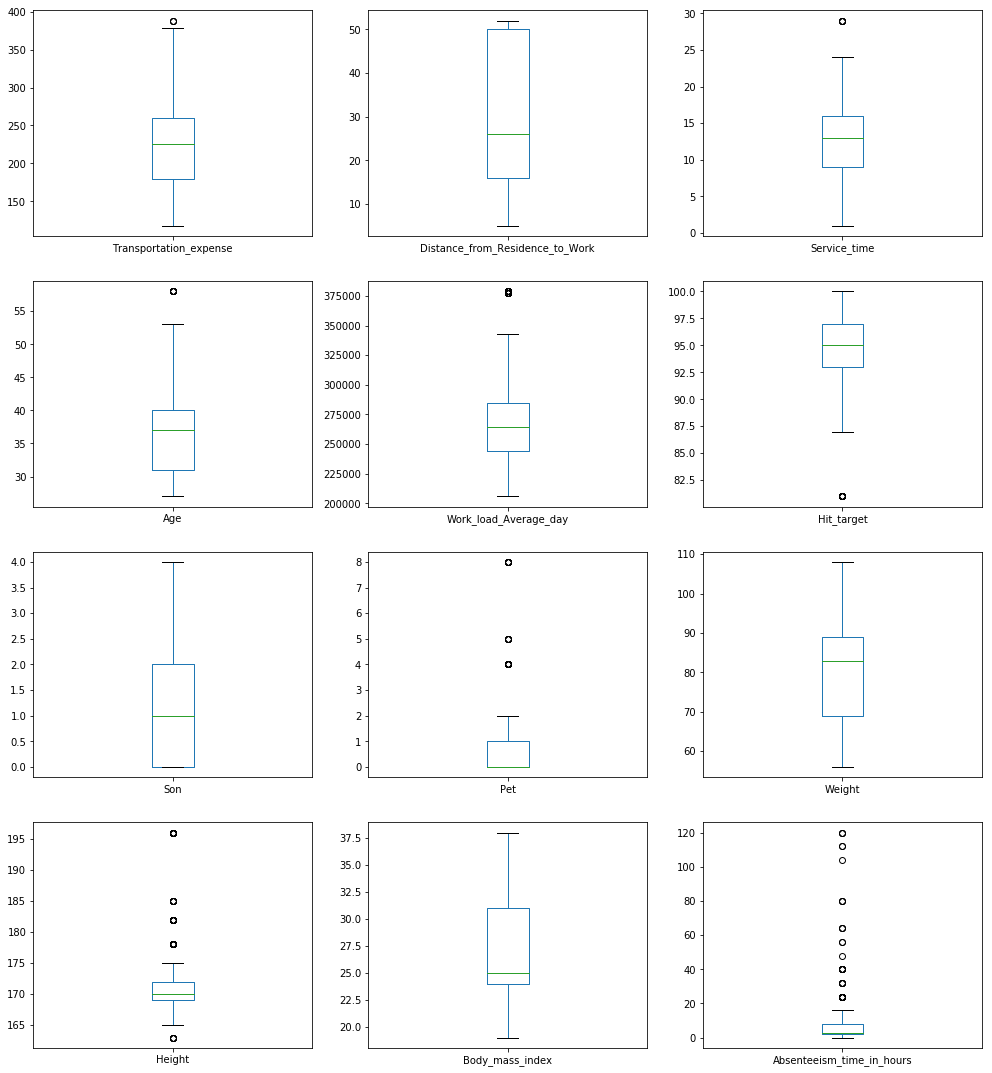

In [69]:
#Boxplots of numeric varaibles before outlier removal
Data_num.plot(kind='box', subplots=True,layout=(8,3), figsize=(17,39), fontsize=10)

In [72]:
#Checking the variable importance with target variable using Extra Tree Regressor to get a feel of importance of variables
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=70)
X = Data.drop(columns=('Absenteeism_time_in_hours'))
y = Data['Absenteeism_time_in_hours']
reg.fit(X, y)
imp_feat = pd.DataFrame({'Feature': Data.drop(columns='Absenteeism_time_in_hours').columns,
                         'importance':reg.feature_importances_*100})
imp_feat.sort_values(by = 'importance', ascending=False).reset_index(drop = True)

,Feature,importance
0,Reason_for_absence,19.559734
1,Day_of_the_week,13.761096
2,Month_of_absence,11.796109
3,Work_load_Average_day,8.551457
4,Seasons,6.864102
5,Hit_target,6.459698
6,Age,6.454382
7,Distance_from_Residence_to_Work,4.764364
8,ID,3.812911
9,Son,3.012994


In [74]:
Data_outliers=Data.copy()

In [76]:
#Checking for outliers range and replacing it with NAs 
for i in cnames:
    print(i)
    q75, q25 = np.percentile(Data_outliers.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    Data_outliers.loc[Data_outliers.loc[:,i] < min, i] = np.nan
    Data_outliers.loc[Data_outliers.loc[:,i] > max, i] = np.nan 

Distance_from_Residence_to_Work
-35.0
101.0
Service_time
-1.5
26.5
Age
17.5
53.5
Work_load_Average_day
183688.0
345552.0
Transportation_expense
57.5
381.5
Hit_target
87.0
103.0
Son
-3.0
5.0
Pet
-1.5
2.5
Weight
39.0
119.0
Height
164.5
176.5
Absenteeism_time_in_hours
-7.0
17.0


In [77]:
missing_val2 = pd.DataFrame(Data_outliers.isnull().sum())
missing_val2

,0
ID,0
Reason_for_absence,0
Month_of_absence,0
Day_of_the_week,0
Seasons,0
Transportation_expense,3
Distance_from_Residence_to_Work,0
Service_time,5
Age,8
Work_load_Average_day,29


In [79]:
cnames_outliers = ['Absenteeism_time_in_hours']

In [80]:
#Creating outliers only for Absenteeism per hour, and leaving other variables untouched
for i in cnames_outliers:
    print(i)
    q75, q25 = np.percentile(Data.loc[:,i], [75 ,25])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    Data.loc[Data.loc[:,i] < min, i] = np.nan
    Data.loc[Data.loc[:,i] > max, i] = np.nan 

Absenteeism_time_in_hours
-7.0
17.0


In [81]:
missing_val3 = pd.DataFrame(Data.isnull().sum())
missing_val3

,0
ID,0
Reason_for_absence,0
Month_of_absence,0
Day_of_the_week,0
Seasons,0
Transportation_expense,0
Distance_from_Residence_to_Work,0
Service_time,0
Age,0
Work_load_Average_day,0


In [82]:
#Impute with mean
Data['Absenteeism_time_in_hours'] = Data['Absenteeism_time_in_hours'].fillna(Data['Absenteeism_time_in_hours'].mean())

In [84]:
for i in catnames:
    Data.loc[:, i] = Data.loc[:, i].astype('category')


Data.iloc[:, 0] = Data.iloc[:, 0].astype(object)

In [85]:
Data_num=Data.select_dtypes(['float64'])
Data_cat=Data.select_dtypes(['category'])
Data_num = Data_num.reset_index(drop=True)
Data_num.index += 1
Data_cat = Data_cat.reset_index(drop=True)
Data_cat.index += 1

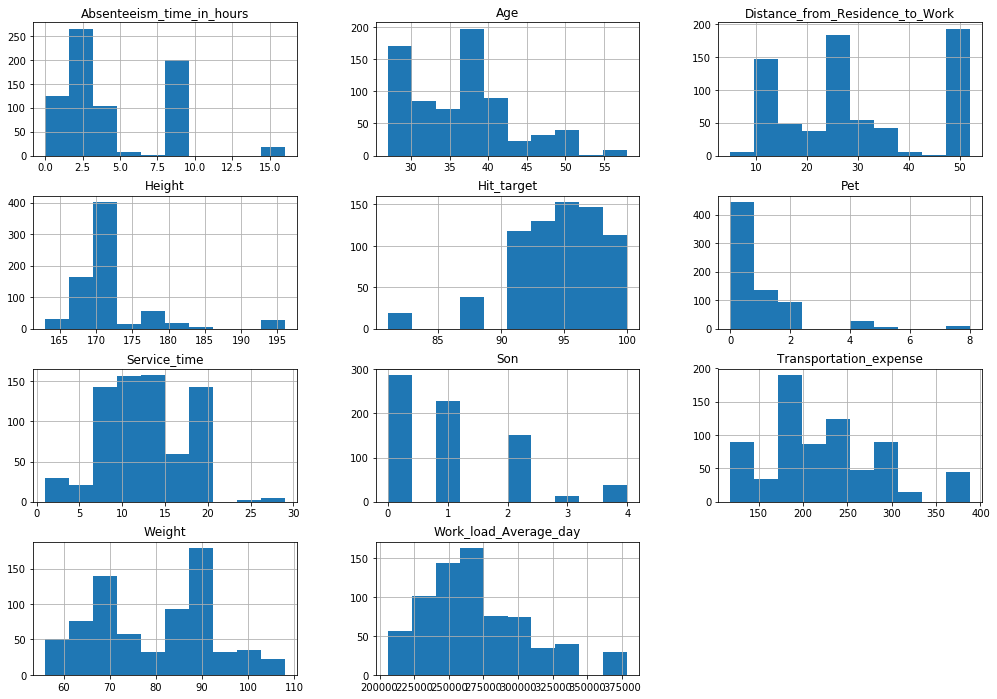

In [86]:
#Histograms after outlier removal
from matplotlib import pyplot
Data_num.hist(figsize=(17,12))
pyplot.show()

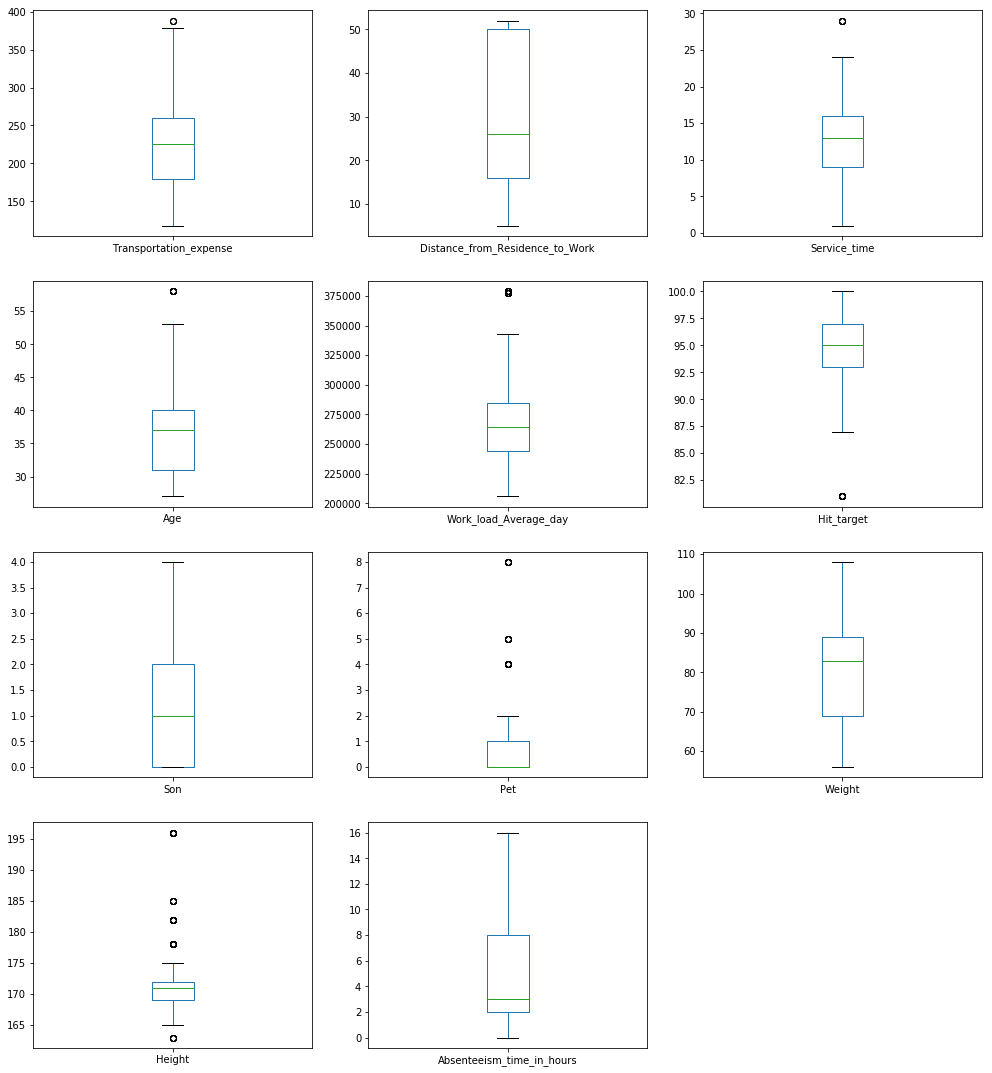

In [87]:
#Boxplots of numeric varaibles after outlier removal
Data_num.plot(kind='box', subplots=True,layout=(8,3), figsize=(17,39), fontsize=10)
pyplot.show()

In [97]:
cnames = ['Distance_from_Residence_to_Work', 'Service_time', 'Age', 'Work_load_Average_day', 'Transportation_expense',
       'Hit_target', 'Son', 'Pet', 'Weight', 'Height']

# Feature Scaling

In [98]:
#Feature Scaling of all numeric varaibles except the target varaible
for i in cnames:
   
    Data[i] = (Data[i] - Data[i].min())/(Data[i].max() - Data[i].min())

In [100]:
from sklearn.cross_validation import train_test_split
from random import *    
from numpy import *

C:\Users\npava\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [101]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [102]:
Data_1=Data.copy()

In [103]:
#Creating dummies for all categorical variables

mylist = list(Data.select_dtypes(include=['category']).columns)
dummies = pd.get_dummies(Data_1[mylist], prefix= mylist,drop_first=True)
Data_1.drop(mylist, axis=1, inplace = True)
Data_1 = pd.concat([Data_1,dummies], axis =1)

In [104]:
#Creating train and test data
random.seed(2)
X = Data_1.drop(columns=['Absenteeism_time_in_hours','ID'])
y = Data_1['Absenteeism_time_in_hours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [105]:
X_train = X_train.reset_index(drop=True)
X_train.index += 1
X_test = X_test.reset_index(drop=True)
X_test.index += 1
y_train = y_train.reset_index(drop=True)
y_train.index += 1
y_test = y_test.reset_index(drop=True)
y_test.index += 1

# Model Deployment

In [106]:
#Linear Regression
from sklearn.metrics import mean_squared_error
from math import sqrt
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
y_pred_train = lr_model.predict(X_train)
y_pred = lr_model.predict(X_test).round(0)

In [107]:
model_lr_dummies = sm.OLS(y_train,X_train).fit()

In [108]:
model_lr_dummies.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Absenteeism_time_in_hours   R-squared:                       0.489
Model:                                   OLS   Adj. R-squared:                  0.429
Method:                        Least Squares   F-statistic:                     8.171
Date:                       Tue, 03 Sep 2019   Prob (F-statistic):           8.80e-45
Time:                               08:19:20   Log-Likelihood:                -1278.6
No. Observations:                        574   AIC:                             2679.
Df Residuals:                            513   BIC:                             2945.
Df Model:                                 60                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Transportation_expense              0.9053      0.593      1.526      0.128      -0.260       2.071
Distance_from_Residence_to_Work     0.0802      0.541      0.148      0.882      -0.982       1.143
Service_time                       -0.3762      1.243     -0.303      0.762      -2.818       2.066
Age                                -1.6579      0.769     -2.155      0.032      -3.169      -0.147
Work_load_Average_day               0.5053      0.588      0.860      0.390      -0.649       1.660
Hit_target                          0.9535      0.932      1.023      0.307      -0.877       2.784
Son                                 0.6798      0.476      1.429      0.154      -0.255       1.614
Pet                                -1.7406      0.863     -2.018      0.044      -3.435      -0.046
Weight                              1.1128      0.638      1.744      0.082      -0.141       2.366
Height                             -1.9055      0.839     -2.271      0.024      -3.554      -0.257
Reason_for_absence_1.0              2.7027      0.840      3.218      0.001       1.053       4.353
Reason_for_absence_2.0              0.1258      2.459      0.051      0.959      -4.704       4.956
Reason_for_absence_3.0              3.8204      2.425      1.575      0.116      -0.945       8.585
Reason_for_absence_4.0              0.6303      1.778      0.355      0.723      -2.863       4.123
Reason_for_absence_5.0              2.1446      1.720      1.247      0.213      -1.234       5.524
Reason_for_absence_6.0              2.7581      0.980      2.815      0.005       0.833       4.683
Reason_for_absence_7.0              0.1993      0.780      0.256      0.798      -1.333       1.731
Reason_for_absence_8.0              1.6196      1.105      1.466      0.143      -0.551       3.790
Reason_for_absence_9.0              4.0011      1.212      3.301      0.001       1.620       6.382
Reason_for_absence_10.0             2.6183      0.679      3.858      0.000       1.285       3.952
Reason_for_absence_11.0             0.8668      0.682      1.272      0.204      -0.472       2.206
Reason_for_absence_12.0             1.9794      1.041      1.902      0.058      -0.066       4.024
Reason_for_absence_13.0             1.3216      0.535      2.470      0.014       0.271       2.373
Reason_for_absence_14.0             0.0914      0.752      0.122      0.903      -1.386       1.568
Reason_for_absence_15.0             3.1322      1.719      1.822      0.069      -0.244       6.509
Reason_for_absence_16.0            -2.3397      1.447     -1.617      0.107      -5.182       0.503
Reason_for_absence_17.0             3.0984      2.445      1.267      0.206      -1.705       7.901
Reason

In [109]:
train_rmse_lr=sqrt(mean_squared_error(y_train,y_pred_train))
print("train_rmse_lr:")
train_rmse_lr

train_rmse_lr:


2.244718851477532

In [110]:
test_rmse_lr=sqrt(mean_squared_error(y_test,y_pred))
print("test_rmse_lr:")
test_rmse_lr

test_rmse_lr:


3.468885332111793

# Performing all the regressions in one go with their default parameters

In [115]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet, Lars
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

regressors = [DecisionTreeRegressor(),  AdaBoostRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), RandomForestRegressor(),
Ridge(), Lasso(), LinearRegression(), ElasticNet(), SVR(), KNeighborsRegressor(),XGBRegressor()]


imp_cols=["regressors", "MSE"]
imp = pd.DataFrame(columns=imp_cols)
for rgr in regressors:
    rgr.fit(X_train, y_train)
    name = rgr.__class__.__name__
    
    print("="*50)
    print(name)
    
    print('Result-test')
    train_predictions = rgr.predict(X_test)
    mse = np.sqrt(mean_squared_error(y_test, train_predictions))
    print("RMSE: {}".format(mse))
    print('Result-train')
    ori_predictions = rgr.predict(X_train)
    mse_t = np.sqrt(mean_squared_error(y_train, ori_predictions))
    print("RMSE: {}".format(mse_t))
    
    print("="*50)
    imp_entry = pd.DataFrame([[name, mse]], columns=imp_cols)
    imp = imp.append(imp_entry)
    


DecisionTreeRegressor
Result-test
RMSE: 4.07883174315454
Result-train
RMSE: 0.25778147678248137
AdaBoostRegressor
Result-test
RMSE: 3.5243271070702042
Result-train
RMSE: 2.602744366061423
GradientBoostingRegressor
Result-test
RMSE: 3.417544584729637
Result-train
RMSE: 1.8979900607526368
ExtraTreesRegressor
Result-test
RMSE: 3.5811021313123
Result-train
RMSE: 0.25778147678248137
RandomForestRegressor
Result-test
RMSE: 3.4424628869702425
Result-train
RMSE: 1.1571512838889126
Ridge
Result-test
RMSE: 3.4425347948048928
Result-train
RMSE: 2.250426117685897
Lasso
Result-test
RMSE: 4.019762340160037
Result-train
RMSE: 3.13913055910843
LinearRegression
Result-test
RMSE: 3.4556611097376413
Result-train
RMSE: 2.244718851477532
ElasticNet
Result-test
RMSE: 4.017314770687356
Result-train
RMSE: 3.135733832376387
SVR
Result-test
RMSE: 3.93376450062967
Result-train
RMSE: 2.8160321613684243
KNeighborsRegressor
Result-test
RMSE: 3.5415976834617022
Result-train
RMSE: 2.311686855366012
[08:24:28] WARNING

C:\Users\npava\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor
Result-test
RMSE: 3.403867678011406
Result-train
RMSE: 1.9589197179623077


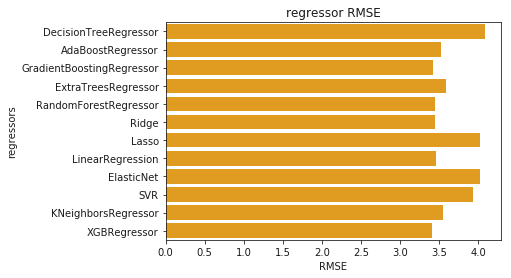

In [116]:
#A plot indicating all regressions' RMSE values for easy comparison
sn.set_color_codes("muted")
sn.barplot(x='MSE', y='regressors', data=imp, color="orange")

plt.xlabel('RMSE')
plt.title('regressor RMSE')
plt.show()

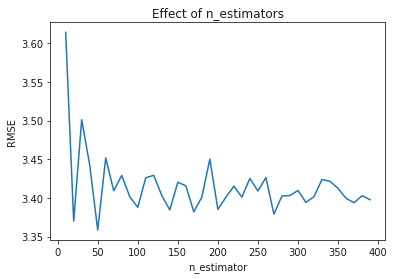

In [117]:
#Checking the number of trees v/s RMSE values 

rf_model = RandomForestRegressor().fit(X_train, y_train)
estimators = np.arange(10, 400, 10)
scores = []

for n in estimators:
    rf_model.set_params(n_estimators=n)
    forest=rf_model.fit(X_train,y_train)
    train_predictions_y = forest.predict(X_test)
    scores.append(np.sqrt(mean_squared_error(y_test, train_predictions_y)))

plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("RMSE")
plt.plot(estimators, scores)

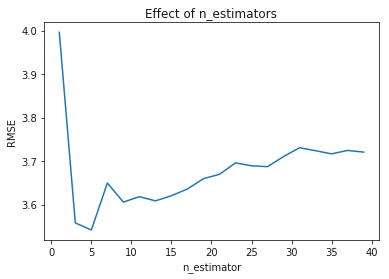

In [118]:
#Checking the number of nearest neighbours v/s RMSE for KNN

KNN_model=KNeighborsRegressor().fit(X_train, y_train)
estimators = np.arange(1, 41, 2)
scores = []

for n in estimators:
    KNN_model.set_params(n_neighbors=n)
    KNN=KNN_model.fit(X_train,y_train)
    train_predictions_y = KNN.predict(X_test)
    scores.append(np.sqrt(mean_squared_error(y_test, train_predictions_y)))

plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("RMSE")
plt.plot(estimators, scores)

# Parameter tuning using GridSearchCV

In [119]:
from sklearn.model_selection import GridSearchCV
regressor = XGBRegressor(random_state=1)
params = [{'n_estimators' : [250, 300,400], 'max_depth':[2, 3], 
           'learning_rate':[0.01,0.05, 0.1, 0.3],'gamma':[0, 0.001, 0.01],
           'subsample':[1, 0.7, 0.8],'random_state' :[1]}]
grid_search = GridSearchCV(estimator=regressor, param_grid=params,cv = 9,
                           scoring = 'explained_variance', n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

C:\Users\npava\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[08:41:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'random_state': 1, 'subsample': 1}


In [126]:
# Building XGBRegressor on tuned parameter
regressor = XGBRegressor(random_state=1, learning_rate=0.01, max_depth=3, n_estimators=400, 
                         gamma = 0, subsample=1)
XGB=regressor.fit(X_train, y_train)

C:\Users\npava\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[08:47:01] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [127]:
train_predictions_XGB = regressor.predict(X_test)
mse_XGB = np.sqrt(mean_squared_error(y_test, train_predictions_XGB))
mse_XGB

3.411903428554373